In [1]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 31.7 MB/s eta 0:00:00


In [4]:
import faiss
import numpy as np
import time
from statistics import mean

# Calc L2 ditance with FAISS

In [5]:
# Build an index
lengths = [10, 100, 1000, 10000, 100000, 500000]

db_time_faiss = []
search_time_faiss = []
for len in lengths:
  data = np.random.rand(len, 512).astype('float32')
  start_time = time.time()
  index = faiss.IndexFlatL2(512) # L2 distance index
  index.add(data)
  end_time = time.time() - start_time
  db_time_faiss.append(end_time)
  print('Create Database Time(FAISS): ', end_time)
  query_vector = np.random.rand(1, 512).astype('float32')
  k = index.ntotal
  start_time = time.time()
  distances, indices = index.search(query_vector, k)
  end_time = time.time() - start_time
  search_time_faiss.append(end_time)
  print('Time Of Search(FAISS)', end_time)

Create Database Time(FAISS):  0.00013828277587890625
Time Of Search(FAISS) 5.745887756347656e-05
Create Database Time(FAISS):  9.083747863769531e-05
Time Of Search(FAISS) 0.00010442733764648438
Create Database Time(FAISS):  0.019954442977905273
Time Of Search(FAISS) 0.0003867149353027344
Create Database Time(FAISS):  0.03384685516357422
Time Of Search(FAISS) 0.009325742721557617
Create Database Time(FAISS):  0.2322549819946289
Time Of Search(FAISS) 0.08532381057739258
Create Database Time(FAISS):  0.7932004928588867
Time Of Search(FAISS) 0.2229459285736084


In [6]:
print('Avg Create Time DB(FAISS) :', mean(db_time_faiss))
print('Avg Search Time (FAISS) :', mean(search_time_faiss))

Avg Create Time DB(FAISS) : 0.1799143155415853
Avg Search Time (FAISS) : 0.05302401383717855


# Calc L2 distance with numpy

In [7]:
array1 = np.random.rand(1, 512)
search_time_np = []
for len in lengths:
  data = np.random.rand(len, 512)
  start_time = time.time()
  # Calculate the L2 distance
  l2_distance = np.linalg.norm(array1 - data, axis=1)
  end_time = time.time() - start_time
  search_time_np.append(end_time)
  print('Time Of Search(numpy)', end_time)

Time Of Search(numpy) 0.00016999244689941406
Time Of Search(numpy) 0.0002608299255371094
Time Of Search(numpy) 0.0027976036071777344
Time Of Search(numpy) 0.04004549980163574
Time Of Search(numpy) 0.34064483642578125
Time Of Search(numpy) 2.3290224075317383


# ScaNN (L2 Distance)

In [8]:
!pip install scann
import scann

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
     

In [9]:
# creating searcher
array1 = np.random.rand(512)
db_time_scann = []
search_time_scann = []
for len in lengths:
  data = np.random.rand(len, 512).astype('float32')
  k = int(np.sqrt(data.shape[0]))
  start_time = time.time()
  searcher = scann.scann_ops_pybind.builder(data, 10, "squared_l2").tree(
      num_leaves=k, num_leaves_to_search=int(k/20), training_sample_size=2500).score_brute_force(2).reorder(20).build()
  end_time = time.time()
  scann_time = end_time - start_time
  db_time_scann.append(scann_time)
  print('Create Database Time(): ', scann_time)
  start_time = time.time()
  neighbors, distances = searcher.search(array1, final_num_neighbors=20)
  end_time = time.time()
  scann_time = end_time - start_time
  search_time_scann.append(scann_time)
  print('Time Of Search', scann_time)

Create Database Time():  0.0038826465606689453
Time Of Search 0.0001125335693359375
Create Database Time():  0.003584623336791992
Time Of Search 6.580352783203125e-05
Create Database Time():  0.021195173263549805
Time Of Search 0.00013399124145507812
Create Database Time():  0.18987107276916504
Time Of Search 0.0002429485321044922
Create Database Time():  2.0597984790802
Time Of Search 0.0023179054260253906
Create Database Time():  23.883264780044556
Time Of Search 0.09152507781982422


# ChromaDB

In [10]:
!pip install -Uq chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6

In [21]:
import random
import string
lengths = [10, 100, 1000, 10000]
array1 = np.random.rand(512)
def generate_random_string(length):
    characters = string.ascii_letters + string.digits
    random_string = ''.join(random.choice(characters) for i in range(length))
    return random_string

In [22]:
import chromadb
client = chromadb.Client()
collection = client.create_collection("test2")
db_time_chroma = []
search_time_chroma = []
for len in lengths:
  data = np.random.rand(len, 512).astype('float32')
  idz = [generate_random_string(16) for i in range(len)]
  strt = time.time()
  collection.add(
      ids=idz,
      embeddings=data,
  )
  end = time.time() - strt
  db_time_chroma.append(end)
  print('Create Database Time(): ', end)
  strt = time.time()
  results = collection.query(array1.reshape((1, 512)),
      n_results=100)
  end = time.time() - strt
  search_time_chroma.append(end)
  print('Search Time (ChromaDB) :', end)

Create Database Time():  0.13708114624023438
Search Time (ChromaDB) : 0.014411687850952148
Create Database Time():  0.23093605041503906
Search Time (ChromaDB) : 0.01126551628112793
Create Database Time():  2.852107524871826
Search Time (ChromaDB) : 0.005764484405517578
Create Database Time():  21.808093309402466
Search Time (ChromaDB) : 0.00767064094543457


In [23]:
print(db_time_chroma)
print(search_time_chroma)

[0.13708114624023438, 0.23093605041503906, 2.852107524871826, 21.808093309402466]
[0.014411687850952148, 0.01126551628112793, 0.005764484405517578, 0.00767064094543457]


In [24]:
from tqdm import tqdm
collection = client.create_collection("test0")
strt = time.time()
for len in tqdm(range(5)):
  data = np.random.rand(20000, 512).astype('float32')
  idz = [generate_random_string(16) for i in range(20000)]
  collection.add(
      ids=idz,
      embeddings=data,
  )
end = time.time() - strt
db_time_chroma.append(end)
print('Create Database Time(): ', end)

strt = time.time()
results = collection.query(array1.reshape((1, 512)),
    n_results=100)
end = time.time() - strt
search_time_chroma.append(end)
print('Search Time (ChromaDB) :', end)

100%|██████████| 5/5 [04:15<00:00, 51.16s/it]

Create Database Time():  255.83130359649658
Search Time (ChromaDB) : 0.008841276168823242


In [29]:
search_time_chroma

[0.014411687850952148,
 0.01126551628112793,
 0.005764484405517578,
 0.00767064094543457,
 0.008841276168823242,
 0.020541667938232422]

In [28]:
collection = client.create_collection("test7")
strt = time.time()
for len in tqdm(range(20)):
  data = np.random.rand(25000, 512).astype('float32')
  idz = [generate_random_string(16) for i in range(25000)]
  collection.add(
      ids=idz,
      embeddings=data,
  )
end = time.time() - strt
db_time_chroma.append(end)
print('Create Database Time(): ', end)

strt = time.time()
results = collection.query(array1.reshape((1, 512)),
    n_results=100)
end = time.time() - strt
search_time_chroma.append(end)
print('Search Time (ChromaDB) :', end)

100%|██████████| 20/20 [26:11<00:00, 78.60s/it]

Create Database Time():  1571.9919335842133
Search Time (ChromaDB) : 0.020541667938232422


# Plot Results

In [32]:
search_time_faiss

[5.745887756347656e-05,
 0.00010442733764648438,
 0.0003867149353027344,
 0.009325742721557617,
 0.08532381057739258,
 0.2229459285736084]

Text(0, 0.5, 'Time(s)')

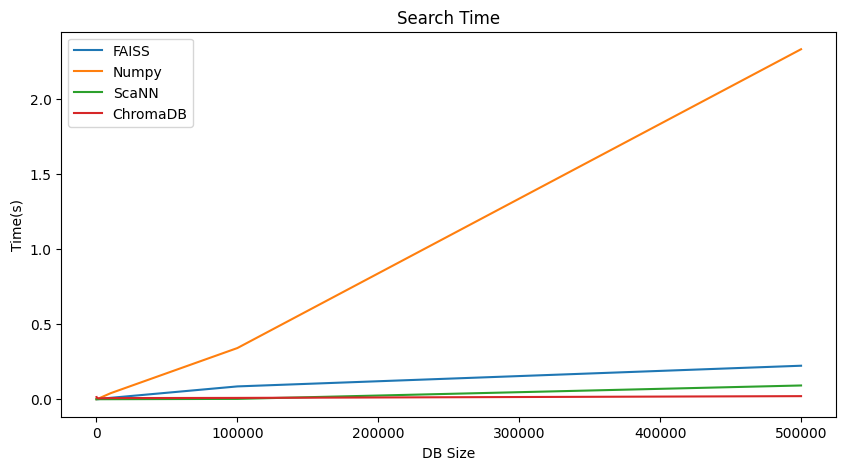

In [35]:
import matplotlib.pyplot as plt
lengths = [10, 100, 1000, 10000, 100000, 500000]
plt.figure(figsize=(10, 5))
plt.plot(lengths, search_time_faiss, label='FAISS')
plt.plot(lengths, search_time_np, label='Numpy')
plt.plot(lengths, search_time_scann, label='ScaNN')
plt.plot(lengths, search_time_chroma, label='ChromaDB')
plt.legend()
plt.title('Search Time')
plt.xlabel('DB Size')
plt.ylabel('Time(s)')

Text(0, 0.5, 'Time(s)')

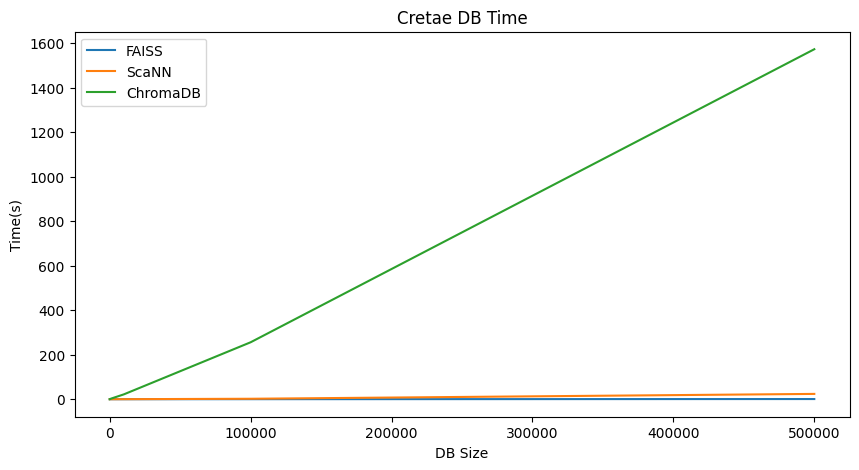

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(lengths, db_time_faiss, label='FAISS')
# plt.plot(search_time_np, label='Numpy')
plt.plot(lengths, db_time_scann, label='ScaNN')
plt.plot(lengths, db_time_chroma, label='ChromaDB')
plt.legend()
plt.title('Cretae DB Time')
plt.xlabel('DB Size')
plt.ylabel('Time(s)')